# 3.3 時系列の予測モデルを構築してみよう

## 3.3.3　ARIMAで構築する予測モデル

### 準備

In [3]:
import numpy as np
import pandas as pd
import datetime

from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 9
plt.rcParams['font.size'] = 14


In [4]:
dataset_path = '../AirPassengers.csv'
df = pd.read_csv(
    dataset_path,
    index_col='Month',
    parse_dates=True
)


In [5]:
train, test = train_test_split(df, test_size=12)


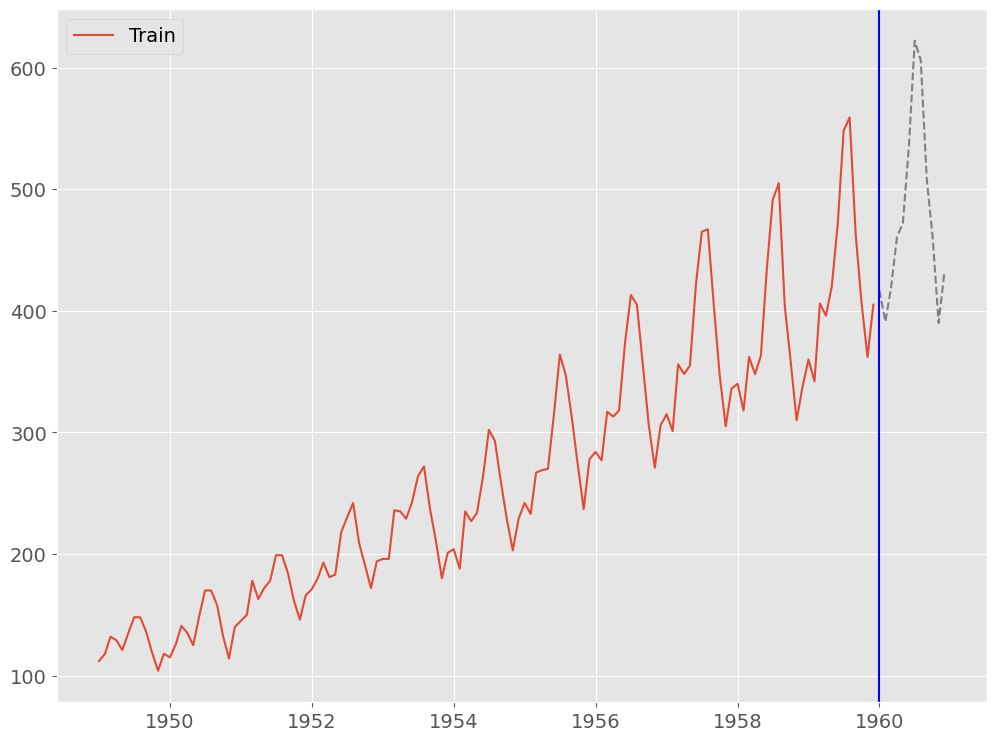

In [6]:
fig, ax = plt.subplots()

ax.plot(
    train.index,
    train.Passengers,
    linestyle='-',
    label='Train'
)

ax.plot(
    test.index,
    test.Passengers,
    linestyle='--',
    color='gray'
)

ax.axvline(
    test.index[0],
    color='blue'
)

ax.legend()
plt.show()


### 予測モデルの学習（学習データ利用）

In [7]:
# 予測モデルの学習（学習データ利用）

# 学習
arima_model = auto_arima(
    train,
    seasonal=True,
    m=12
)

print(arima_model.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Sun, 25 Feb 2024   AIC                            905.686
Time:                                    15:43:50   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095   

### 予測モデルのテスト（テストデータ利用）

In [26]:
# 予測の実施

train_pred = arima_model.predict_in_sample()

test_pred = arima_model.predict(n_periods=12)


In [27]:
# 予測精度（テストデータ）

print(f'RMSE:\n {mean_squared_error(test, test_pred, squared=False)}')
print(f'MAE:\n {mean_absolute_error(test, test_pred)}')
print(f'MAPE:\n {mean_absolute_percentage_error(test, test_pred)}')


RMSE:
 18.536468695501895
MAE:
 14.898208209798137
MAPE:
 0.03097561514550175


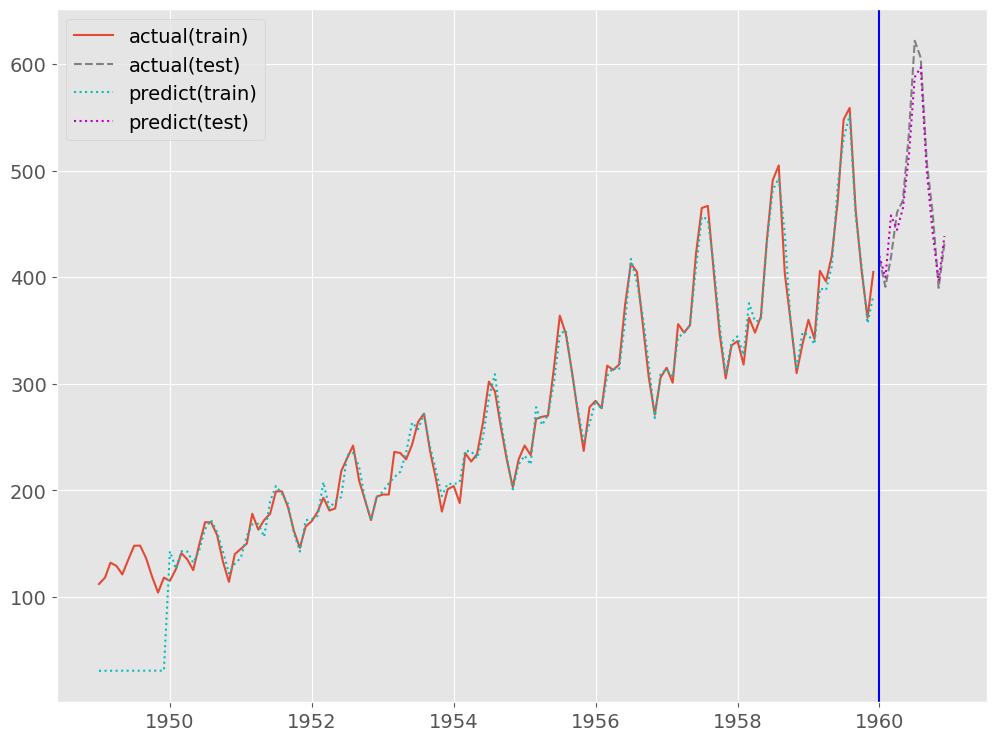

In [28]:
# グラフ表示

fig, ax = plt.subplots()

ax.plot(
    train.index,
    train.Passengers,
    linestyle='-',
    label='actual(train)'
)

ax.plot(
    test.index,
    test.Passengers,
    linestyle='--',
    color='gray',
    label='actual(test)'
)

ax.plot(
    train_pred.index,
    train_pred,
    linestyle=':',
    color='c',
    label='predict(train)'
)

ax.plot(
    test_pred.index,
    test_pred,
    linestyle=':',
    color='m',
    label='predict(test)'
)

ax.axvline(
    test.index[0],
    color='blue'
)
ax.legend()
plt.show()


## 3.3.4 ホルトウィンターズで構築する予測モデル

### 準備

In [29]:
import pandas as pd
import numpy as np
import datetime

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from pmdarima.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフスタイル
plt.rcParams['figure.figsize'] = [12, 9] #グラフサイズ
plt.rcParams['font.size'] = 14 #フォントサイズ


In [30]:
dataset_path = '../AirPassengers.csv'
df = pd.read_csv(
    dataset_path,
    index_col='Month',
    parse_dates=True
)


In [34]:
train, test = train_test_split(df, test_size=12)


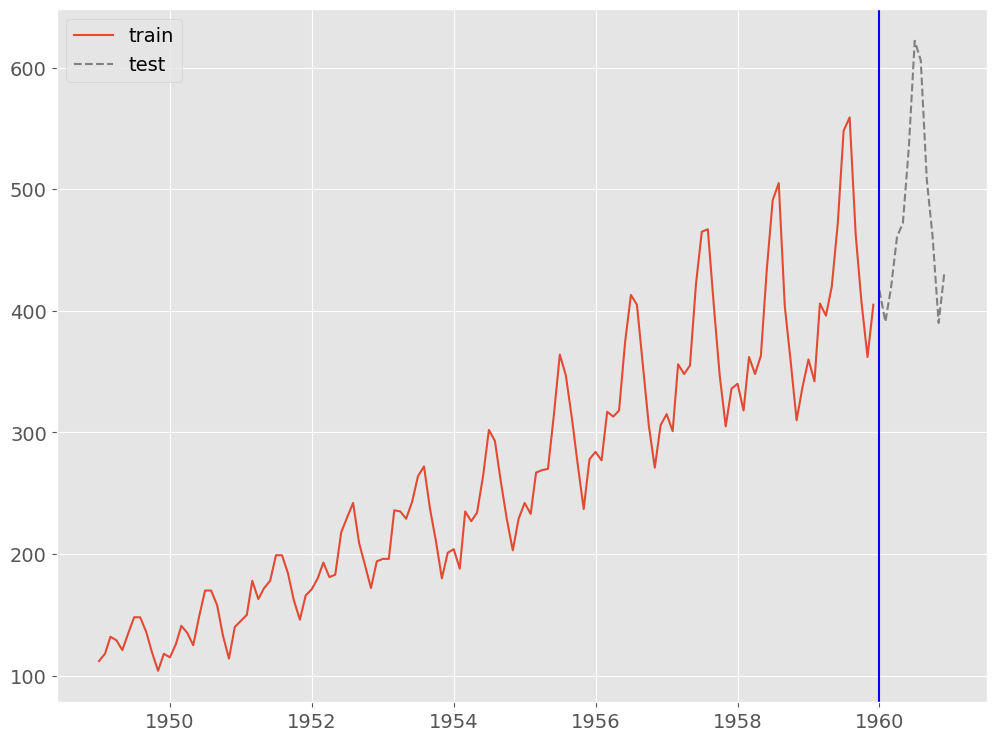

In [36]:
fig, ax = plt.subplots()

# 学習データの描写
ax.plot(
    train.index,
    train.values, 
    linestyle='-',
    label='train')

# テストデータの描写
ax.plot(
    test.index, 
    test.values, 
    linestyle='--',
    label='test', 
    color='gray') 

# 学習データとテスデータの間の縦線の描写
ax.axvline(
    test.index[0],
    color='blue') 

# 凡例表示
ax.legend() 

plt.show()


### 予測モデルの学習

In [53]:
# インスタンスの生成
HW_model = ExponentialSmoothing(
    train,
    trend='additive',
    seasonal='additive',
    seasonal_periods=12
)

# 学習
HW_model_fitted = HW_model.fit()


### 予測モデルのテスト

In [54]:
# 予測の実施

train_pred = HW_model_fitted.fittedvalues

test_pred = HW_model_fitted.forecast(12)


In [55]:
# 予測精度（テストデータ）
#

print('RMSE:\n',
      np.sqrt(mean_squared_error(
          test.Passengers, test_pred)))
print('MAE:\n',
      mean_absolute_error(
          test.Passengers, test_pred)) 
print('MAPE:\n',
      mean_absolute_percentage_error(
          test.Passengers, test_pred))


RMSE:
 16.979675467574893
MAE:
 13.380145335853646
MAPE:
 0.02802765503520345


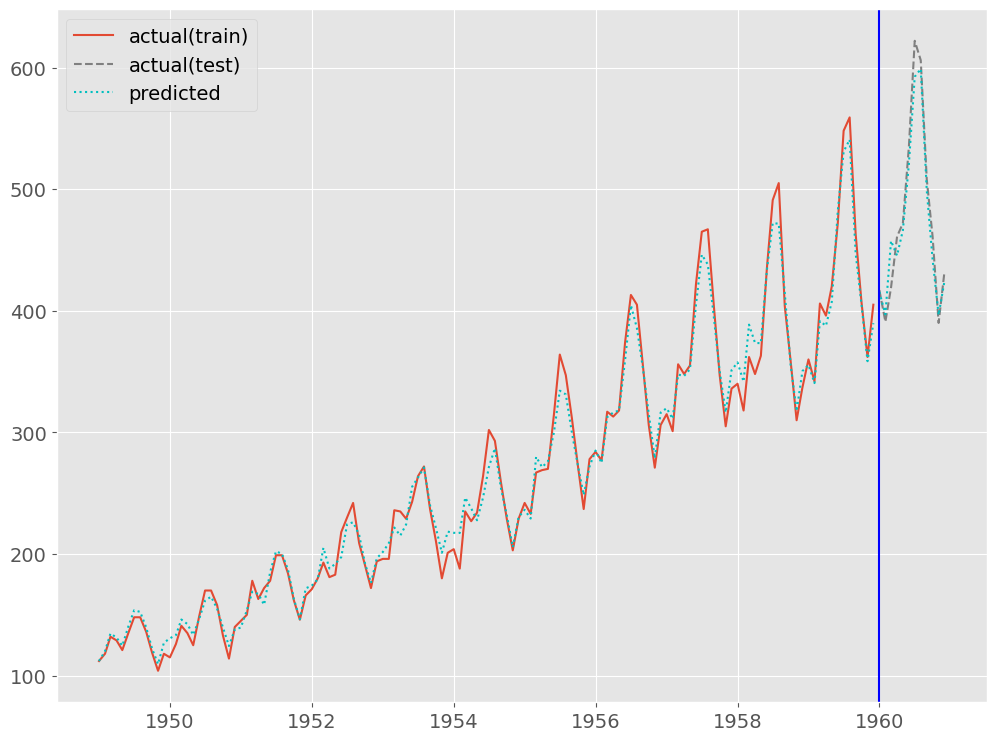

In [56]:
fig, ax = plt.subplots()

# 実測値の描写
## 学習データ
ax.plot(
    train.index, 
    train.Passengers, 
    linestyle='-',
    label='actual(train)')

## テストデータ
ax.plot(
    test.index, 
    test.Passengers, 
    linestyle='--',
    label='actual(test)', 
    color='gray')

# 予測値の描写
## 学習データ
ax.plot(
    train.index, 
    train_pred, 
    linestyle=':',
    color='c')

## テストデータ
ax.plot(
    test.index, 
    test_pred, 
    linestyle=':',
    label="predicted",
    color="c") 

# 学習データとテスデータの間の縦線の描写
ax.axvline(
    datetime.datetime(1960,1,1),
    color='blue')

# 凡例表示
ax.legend()

plt.show()


## 3.3.5 Prophetで構築する予測モデル（ハイパーパラメータそのまま）

### 準備

In [42]:
import numpy as np
import pandas as pd
import datetime

from prophet import Prophet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from pmdarima.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフスタイル
plt.rcParams['figure.figsize'] = [12, 9] #グラフサイズ
plt.rcParams['font.size'] = 14 #フォントサイズ


Importing plotly failed. Interactive plots will not work.


In [44]:
dataset_path = '../AirPassengers.csv'
df = pd.read_csv(dataset_path)
df.columns = ['ds', 'y']

df


,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [57]:
train, test = train_test_split(df, test_size=12)


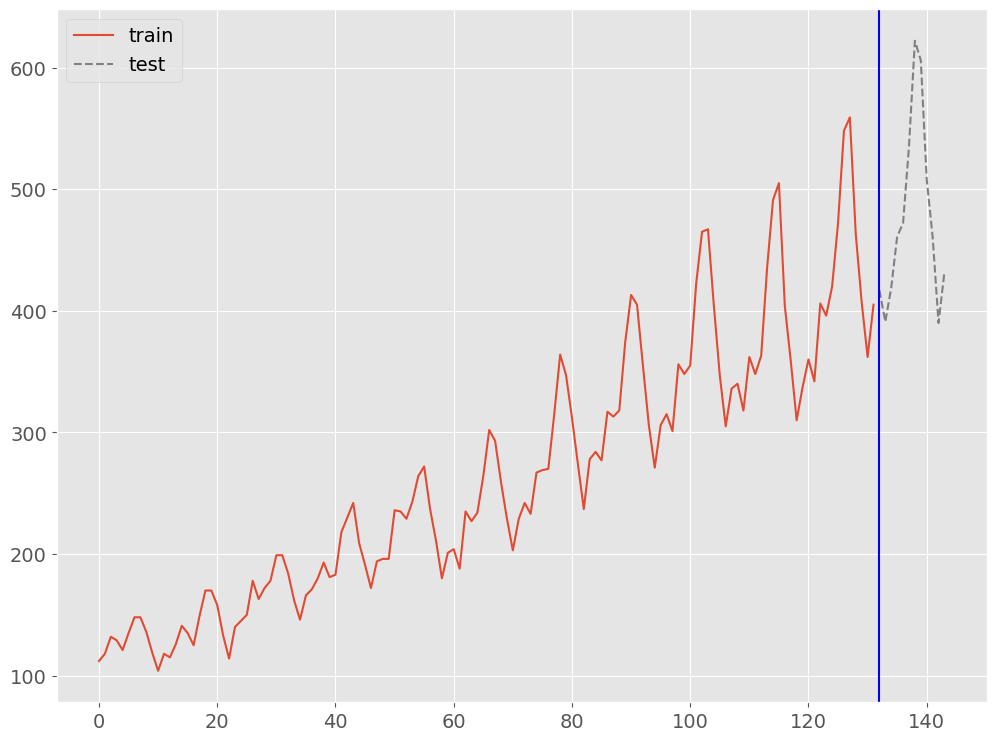

In [58]:
fig, ax = plt.subplots()

# 学習データの描写
ax.plot(
    train.index,
    train.y.values, 
    linestyle='-',
    label='train')

# テストデータの描写
ax.plot(
    test.index, 
    test.y.values, 
    linestyle='--',
    label='test', 
    color='gray')

# 学習データとテスデータの間の縦線の描写
ax.axvline(
    132,
    color='blue')

# 凡例表示
ax.legend()

plt.show()


### 予測モデルの学習（学習データ利用）

In [65]:
# インスタンスの生成
m = Prophet()

# 学習
m.fit(train)


23:28:25 - cmdstanpy - INFO - Chain [1] start processing


23:28:25 - cmdstanpy - INFO - Chain [1] done processing


### 予測モデルのテスト（テストデータ利用）

In [76]:
# 予測（学習データ期間＋テストデータ期間）
df_future = m.make_future_dataframe(
    periods=12,
    freq='M'
)

df_pred = m.predict(df_future)

df['predicted'] = df_pred['yhat']

# 予測値の格納
train_pred = df['predicted'].iloc[:-12]
test_pred = df['predicted'].iloc[-12:]


In [77]:
# 予測精度（テストデータ）

print('RMSE:\n',
      mean_squared_error(
          test.y, test_pred, squared=False))
print('MAE:\n',
        mean_absolute_error(
            test.y, test_pred))
print('MAPE:\n',
        mean_absolute_percentage_error(
            test.y, test_pred))



RMSE:
 41.54087136486842
MAE:
 34.00567346453111
MAPE:
 0.06783770424432196


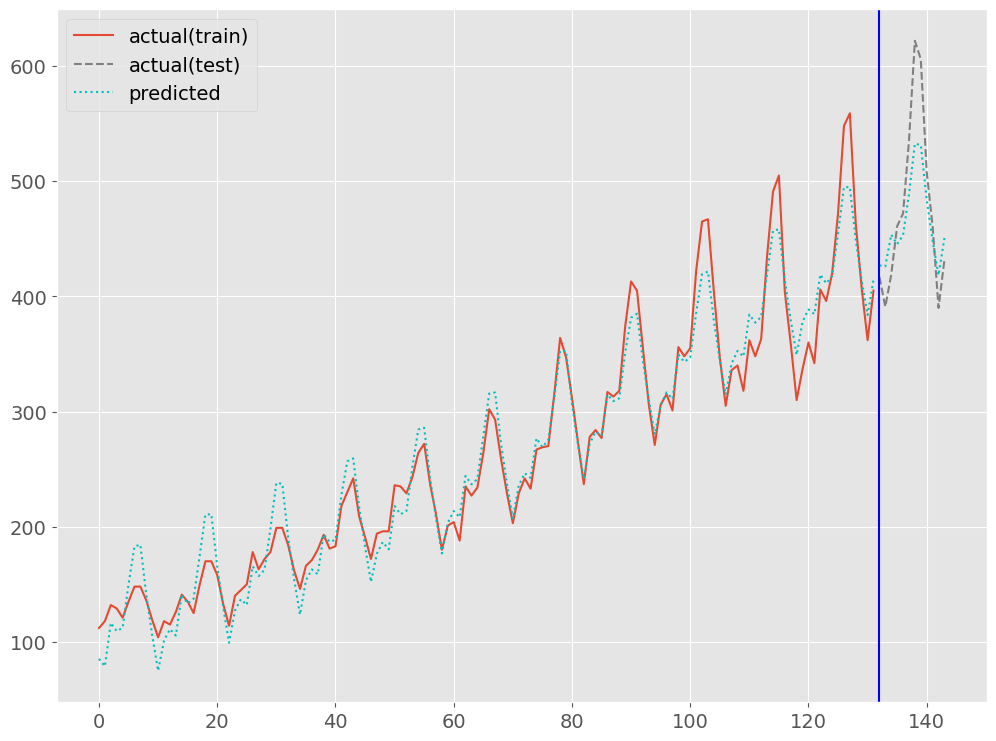

In [85]:
fig, ax = plt.subplots()

# 実測値の描写
## 学習データ
ax.plot(
    train.index, 
    train.y,
    linestyle='-',
    label='actual(train)')

## テストデータ
ax.plot(test.index, 
        test.y, 
        linestyle='--',
        label='actual(test)', 
        color='gray')

# 予測値の描写
## 学習データ
ax.plot(
    train.index, 
    train_pred, 
    linestyle=':',
    color='c')

## テストデータ
ax.plot(
    test.index, 
    test_pred, 
    linestyle=':',
    label='predicted',
    color='c') 

# 学習データとテスデータの間の縦線の描写
ax.axvline(
    test.index[0],
    color='blue')

# 凡例表示
ax.legend()

plt.show()


## 3.3.6 Prophetで構築する予測モデル（ハイパーパラメータ自動探索）